In [1]:
import pandas as pd
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
data = pd.read_csv('ZiyiLiu.csv',header=None)

C:\Users\lenovo\Anaconda3\envs\bayesianStats\lib\site-packages\pymc3\sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 57 seconds.


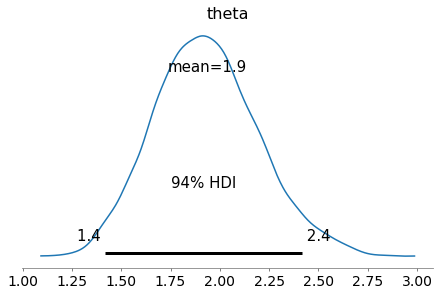

In [6]:
with pm.Model()as liu_model:
    theta = pm.HalfNormal('theta',sigma = 10)    
    y = pm.Exponential('y', lam = theta , observed=data)
    trace = pm.sample(2000,  progressbar=True)
    pp = az.plot_posterior(trace)
    map_estimator = pm.find_MAP()
    az.summary(trace)
    plt.show()

In [8]:
result = az.summary(trace)

C:\Users\lenovo\Anaconda3\envs\bayesianStats\lib\site-packages\arviz\data\io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


In [9]:
print(
        'The expected value is {0} and the variance is {1}'.format(result['mean']['theta'],
                                                                   np.power(result['sd']['theta'], 2)))

The expected value is 1.934 and the variance is 0.071289


C:\Users\lenovo\Anaconda3\envs\bayesianStats\lib\site-packages\arviz\data\io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


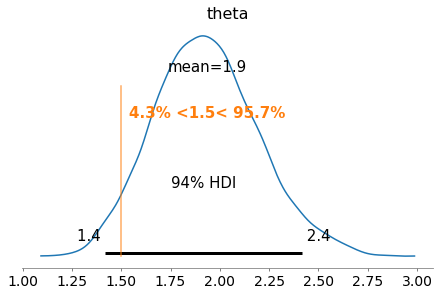

In [10]:
az.plot_posterior(trace, ref_val=1.5)
plt.show()

In [11]:
print("The MAP estimator for the model is {0}".format(map_estimator['theta']))

The MAP estimator for the model is 1.8956243920335873


In [12]:
quadratic_estimation = np.average(trace['theta'])
print("The quadratic estimation for theta is {0}".format(quadratic_estimation))

The quadratic estimation for theta is 1.9337459613624244


In [13]:
predictions = pm.sample_posterior_predictive(trace, samples=3, model=liu_model)['y'][0]

C:\Users\lenovo\Anaconda3\envs\bayesianStats\lib\site-packages\pymc3\sampling.py:1688: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


C:\Users\lenovo\Anaconda3\envs\bayesianStats\lib\site-packages\arviz\data\io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


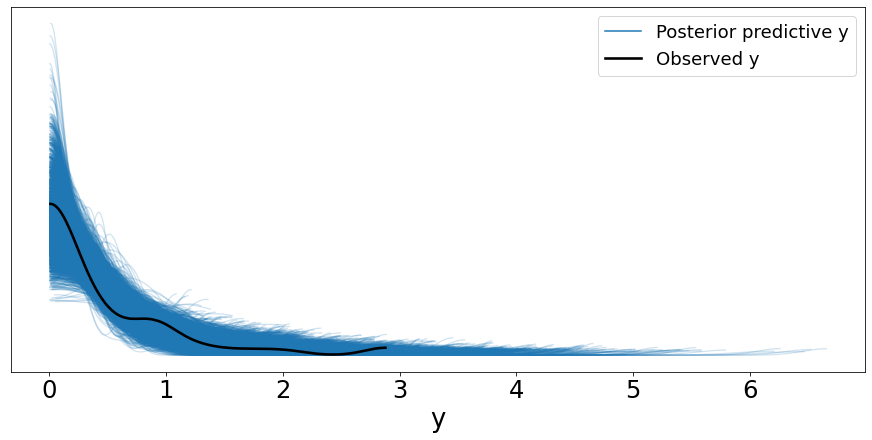

In [14]:
predictions_for_ppc = pm.sample_posterior_predictive(trace,
                                                     model=liu_model)
data_ppc = az.from_pymc3(trace=trace, posterior_predictive=predictions_for_ppc)
ax = az.plot_ppc(data_ppc, figsize=(12, 6), mean=False)
plt.show()